In [16]:
import sys
import mxnet as mx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mxnet import gluon 
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image

from DataReader import *
from Net import *
from ResNet import *

In [2]:
net = Resnet()

In [3]:
net.load_parameters('recognizer2.params')

In [4]:
train_data, test_data = Load_CIFAR10()
# Creates Data Iterators with batch_size 256 using 4 threads
train_iter, test_iter = Get_Iters(train_data,test_data,128,4)

In [87]:
accuracy = 0
outputs = []
for data,label in test_iter:
        output = net.net(data.as_in_context(net.ctx))
        outputs.append(output)
        if output.asnumpy().argmax() == label.asnumpy()[0]:
            accuracy += 1

result = float(accuracy/len(test_data))
print(result*100,"%")

72.28 %


In [100]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

ship


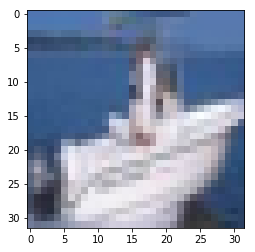

In [119]:
index = 9000
print(labels[outputs[index].asnumpy().argmax()])

img_data = test_data[index][0].asnumpy()
img = Image.fromarray(img_data)
imshow(img)